# Exploring relationships between variables

This script contains the following:
1. Importing Visualization Libraries and Data
2. Data Cleaning
3. Exploring Relationships

 Correlations
 Scatterplots
 Pair Plots
 Categorical Plots

1.Importing Visualization Libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
#Exploring the version of matplotlib
matplotlib.__version__

'3.5.1'

In [4]:
#Ensuring charts are displayed in the Notebook
%matplotlib inline

In [5]:
#Defining a path
path = r'C:\Users\user\Waiting times for priority procedures'

In [6]:
#importing dataset
df_wait = pd.read_csv(os.path.join(path, '1.Data','Prepared data','wait_time_transformed.csv'))

#WE HAVE IMPORTED THE DATASET WHICH IS TRANSFORMED VERSION OF OF THE 'Wait_time_cleaned.csv' dataset that we saved in previous notebook 'TASK 6.1'
- The transformed dataset is derived by using pivot charts on the 'wait_time_cleaned' dataset in Excel.

In [7]:
# Importing Benchmarked dataset
df_bm = pd.read_csv(os.path.join(path, '1.Data','Prepared data','wait_time_benchmarked.csv'))

In [8]:
df_wait.shape

(1487, 7)

In [9]:
df_wait.head()

,state,medical_procedure,year,%meeting_benchmark,50th_percentile_days,90th_percentile_days,total_cases
0,Alberta,Bladder Cancer Surgery,2013,NA,28,57,477
1,Alberta,Bladder Cancer Surgery,2014,NA,29,64,488
2,Alberta,Bladder Cancer Surgery,2015,NA,28,70,542
3,Alberta,Bladder Cancer Surgery,2016,NA,30,70,448
4,Alberta,Bladder Cancer Surgery,2017,NA,30,69,573


In [10]:
# Renaming columns whose names are difficult to understand
df_wait.rename(columns = {'50th_percentile_days':'median_days','90th_percentile_days':'maximum_days'},inplace=True)# Renaming columns whose names are difficult to understand
df_bm.rename(columns = {'50th_percentile_days':'median_days','90th_percentile_days':'maximum_days'},inplace=True)

In [11]:
df_wait.head()

,state,medical_procedure,year,%meeting_benchmark,median_days,maximum_days,total_cases
0,Alberta,Bladder Cancer Surgery,2013,NA,28,57,477
1,Alberta,Bladder Cancer Surgery,2014,NA,29,64,488
2,Alberta,Bladder Cancer Surgery,2015,NA,28,70,542
3,Alberta,Bladder Cancer Surgery,2016,NA,30,70,448
4,Alberta,Bladder Cancer Surgery,2017,NA,30,69,573


In [12]:
#checking the datatypes
df_wait.dtypes

state                 object
medical_procedure     object
year                   int64
%meeting_benchmark    object
median_days            int64
maximum_days           int64
total_cases            int64
dtype: object

Missing values check

In [13]:
df_wait.shape

(1487, 7)

In [14]:
df_wait.isnull().sum()

state                 0
medical_procedure     0
year                  0
%meeting_benchmark    0
median_days           0
maximum_days          0
total_cases           0
dtype: int64

In [15]:
df_wait.shape #NO Null values

(1487, 7)

Checking for duplicates

In [16]:
df_dups = df_wait[df_wait.duplicated()]

In [17]:
df_dups.shape # No duplicates

(0, 7)

Checking for mixed type data

In [18]:
for col in df_wait.columns.tolist():
      weird = (df_wait[[col]].applymap(type) != df_wait[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_wait[weird]) > 0:
        print (col)
        # No MIXED DATA TYPES

# 3.Exploring Relationship

 # Correlations

In [19]:
# Creating a Correlation matrix
df_wait.corr()

,year,median_days,maximum_days,total_cases
year,1.000000,-0.001864,-0.036317,0.050304
median_days,-0.001864,1.000000,0.943467,-0.085579
maximum_days,-0.036317,0.943467,1.000000,-0.046978
total_cases,0.050304,-0.085579,-0.046978,1.000000


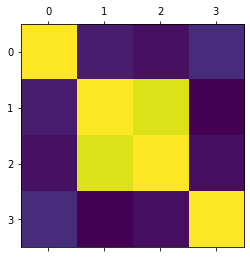

In [20]:
plt.matshow(df_wait.corr())
plt.show()

WE CAN ALSO SEE A HEAT MAP INVOLVING THE '%MEETING_BENCHMARK'.
- Since there set benchmarks only for waiting times of certain procedures we will create a dataset only for those procedures.
- These procedures are:
  hip and knee replacement, hip fracture repair, radiation therapy and cataract surgery.
- we have a seperate dataset 'df_bm' which is derived from 'wait_list_transformed'dataset to analyze these procedures with established benchmarks.

In [21]:
df_bm.head()

,state,medical_procedure,year,%meeting_benchmark,median_days,maximum_days,total_cases
0,Alberta,CABG,2008,99.0,7,83,511
1,Alberta,CABG,2009,93.0,17,156,665
2,Alberta,CABG,2010,95.0,15,133,590
3,Alberta,CABG,2011,95.0,15,134,369
4,Alberta,Cataract Surgery,2008,71.0,70,199,8662


In [22]:
#creating a correlation matrix for benchmarked dataset
df_bm.corr()

,year,%meeting_benchmark,median_days,maximum_days,total_cases
year,1.000000,-0.192563,0.175578,0.098973,0.039195
%meeting_benchmark,-0.192563,1.000000,-0.891230,-0.855105,0.034890
median_days,0.175578,-0.891230,1.000000,0.946551,-0.081748
maximum_days,0.098973,-0.855105,0.946551,1.000000,-0.038220
total_cases,0.039195,0.034890,-0.081748,-0.038220,1.000000


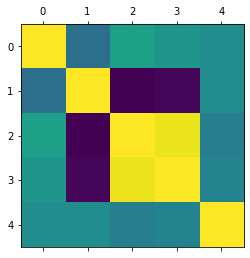

In [23]:
plt.matshow(df_bm.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

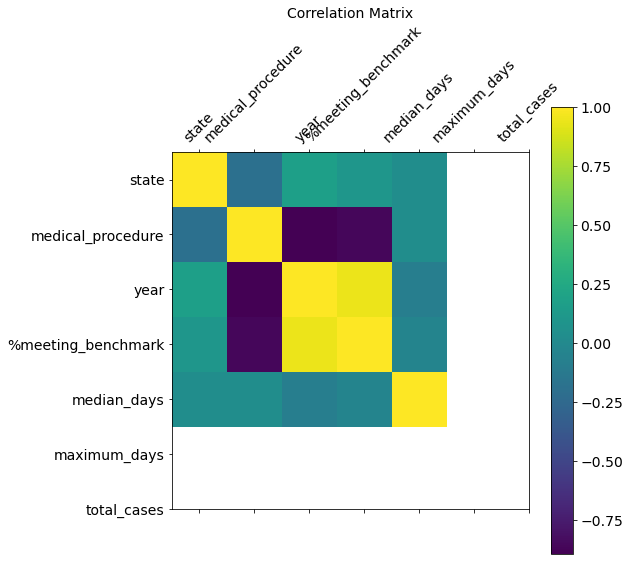

In [24]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_bm.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_bm.shape[1]), df_bm.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_bm.shape[1]), df_bm.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [25]:
df_bm.columns

Index(['state', 'medical_procedure', 'year', '%meeting_benchmark',
       'median_days', 'maximum_days', 'total_cases'],
      dtype='object')

In [26]:
#creating a subset excluding 'state' and 'medical_procedure'
df_sub= df_bm[['year','%meeting_benchmark','median_days','maximum_days','total_cases']]

In [27]:
df_sub

,year,%meeting_benchmark,median_days,maximum_days,total_cases
0,2008,99.0,7,83,511
1,2009,93.0,17,156,665
2,2010,95.0,15,133,590
3,2011,95.0,15,134,369
4,2008,71.0,70,199,8662
...,...,...,...,...,...
776,2017,97.0,7,15,1031
777,2018,97.0,7,18,1052
778,2019,97.0,8,20,1079
779,2020,97.0,7,21,1173


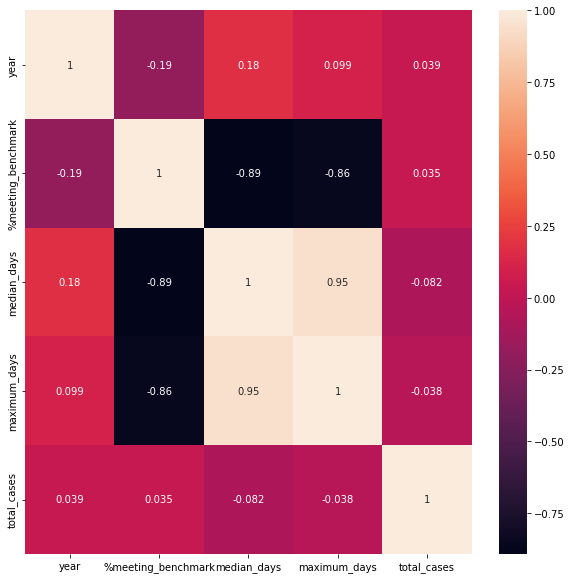

In [28]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

FROM THE HEATMAP ABOVE WE CAN INFER THAT:
- There is a strong negative correlation between '%meeting_benchmark' and 'maximum_days'(coeff= -0.86) and 'median_days'(coeff= -0.89).
- There has been a slight decrease in the "% meeting benchmark"(coeff= -0.19) over the years and a slight increase in median waiting times(coeff= 0.18)
- There is a weak negative correlation(-0.082) between total cases and median_days which means the median waiting time decreases as the total cases increases.

# Scatterplots

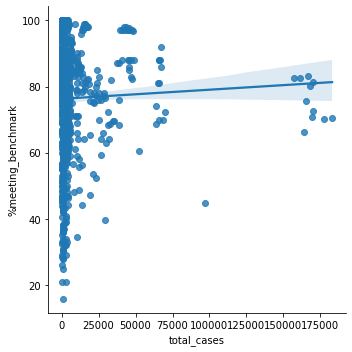

In [29]:
# let us create a scatterplot of '%meeting_benchmark' against 'total_cases'
sns.lmplot(x = 'total_cases', y = '%meeting_benchmark', data = df_bm)

From the scatterplot we can very well say that total number of cases has little or no impact on the % of cases that achieved the benchmark.

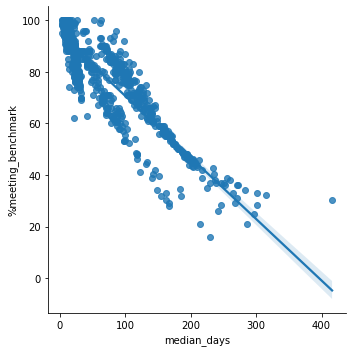

In [30]:
# let us plot a scatterplot of '%meeting_benchmark' against 'median_days'
sns.lmplot(x = 'median_days', y = '%meeting_benchmark', data = df_bm)

There is a strong negative correlation between the variables.
- This means that as the median waiting time increases the % of cases achieving the benchmark decreases.

# Creating a pair plot

In [43]:
sub_2= df_wait[['medical_procedure','median_days','maximum_days','total_cases']]

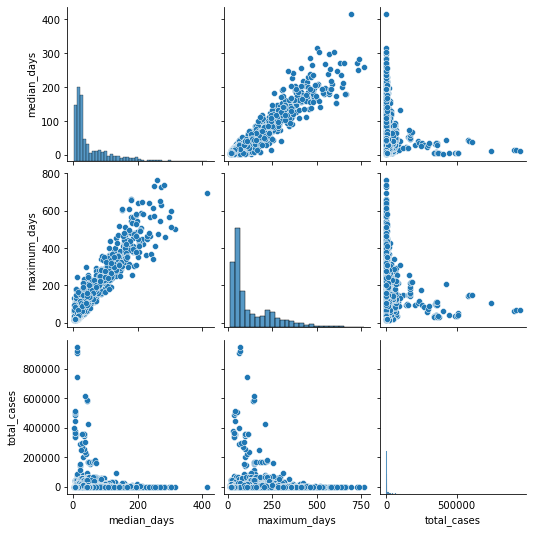

In [44]:
# Create a pair plot 

g = sns.pairplot(sub_2)

In [47]:
sub_bm = df_bm[['%meeting_benchmark','median_days','maximum_days','total_cases']]

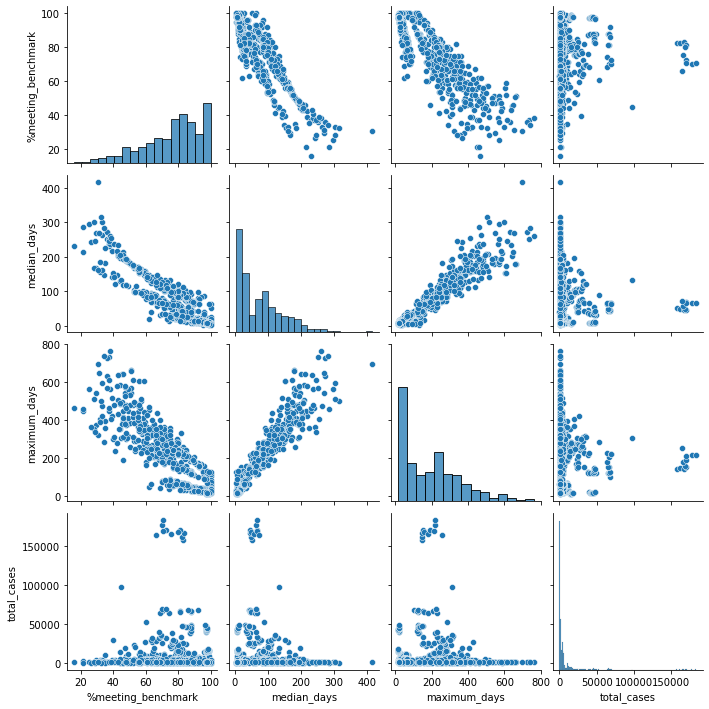

In [48]:
#creating  a paired plot for benchmarked datasheet
g = sns.pairplot(sub_bm)

Insights and further explorations based on the paired plot:
- we would like to explore the medical procedure wise performance for each of the metric variables like 'total_cases', '%meeting_benchmark', 'median_days','maximum_days,etc. This way we can have procedure wise as well as statewise evaluation of the overall healthcare performance w.r.t 'waiting times'.
- we will also further explore the impact of 'median_days' and 'maximum_days' on '%meeting benchmark'

# Categorical plots

Creating histogram for the variable '%meeting_benchmark'

<AxesSubplot:xlabel='%meeting_benchmark', ylabel='Count'>

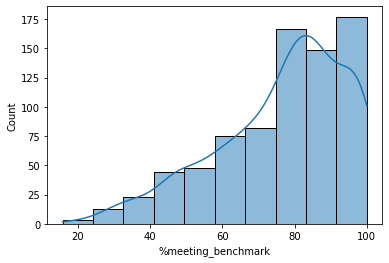

In [31]:
sns.histplot(df_bm['%meeting_benchmark'], bins = 10, kde = True)

The histogram shows that majority of cases are close to the benchmark

In [40]:
#converting datatype of '%meeting_benchmark' to int 16
df_bm['%meeting_benchmark'] = df_bm['%meeting_benchmark'].astype('int16')

In [41]:
# categorizing based on '%achieving benchmark
df_bm.loc[df_bm['%meeting_benchmark']<=60, 'outcome'] = 'Below_average'
df_bm.loc[(df_bm['%meeting_benchmark'] > 60) & (df_bm['%meeting_benchmark'] <= 80), 'outcome'] = 'Average'
df_bm.loc[df_bm['%meeting_benchmark'] > 80,'outcome'] = 'Good'

In [42]:
df_bm['outcome'].value_counts(dropna=False)

Good             382
Average          248
Below_average    151
Name: outcome, dtype: int64

In [43]:
df_bm.columns

Index(['state', 'medical_procedure', 'year', '%meeting_benchmark',
       'median_days', 'maximum_days', 'total_cases', 'outcome'],
      dtype='object')

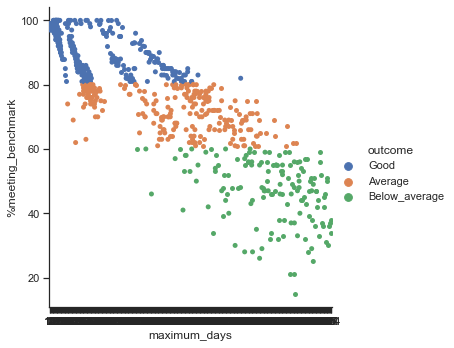

In [44]:
#creating a categorical plot using seaborn using the 'outcome' categories created above
sns.set(style="ticks")
g = sns.catplot(x="maximum_days", y="%meeting_benchmark", hue="outcome", data=df_bm)

It is obvious from the above chart that procedures where the maximum  waiting time is less are more likely to achieve the benchmark.